In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

In [16]:
dict_training_data = pickle.load(open( "data2.dat", "rb" ))

In [8]:
dict_training_data.keys()

['59d638667bfe0b5f22bd6436: Deproach Mount',
 '59d638667bfe0b5f22bd6449: Pitasc - Insert Upright',
 '59d638667bfe0b5f22bd6437: Open wsg50 gripper',
 '59d638667bfe0b5f22bd6420: Motek - Erebus Unmount',
 '59d638667bfe0b5f22bd645f: Pick Erebus',
 '59d638667bfe0b5f22bd6458: Denso Take Arm',
 '59d638667bfe0b5f22bd6450: Pickposition',
 '59d638667bfe0b5f22bd6461: Open wsg50 gripper',
 '59d638667bfe0b5f22bd6433: Unmount Position',
 '59d638667bfe0b5f22bd6434: Open wsg50 gripper',
 '59d638667bfe0b5f22bd6423: Tray',
 '59d638667bfe0b5f22bd6457: Pitasc-Sub - Erebus Mount Part',
 '59db526ed39e2d65b2ba2525: Denso Take Arm',
 '59d638667bfe0b5f22bd644e: Mount Position',
 '59d638667bfe0b5f22bd645b: Denso Give Arm',
 '59d638667bfe0b5f22bd6431: Tray',
 '59d64b0a7bfe0b5f22bd6466: Homeposition',
 '59d638667bfe0b5f22bd644c: Tilt to Approach',
 '59d638667bfe0b5f22bd643c: Denso Give Arm',
 '59d638667bfe0b5f22bd642a: Tray',
 '59d638667bfe0b5f22bd642d: Open wsg50 gripper',
 '59d638667bfe0b5f22bd644a: Pitasc - Mo

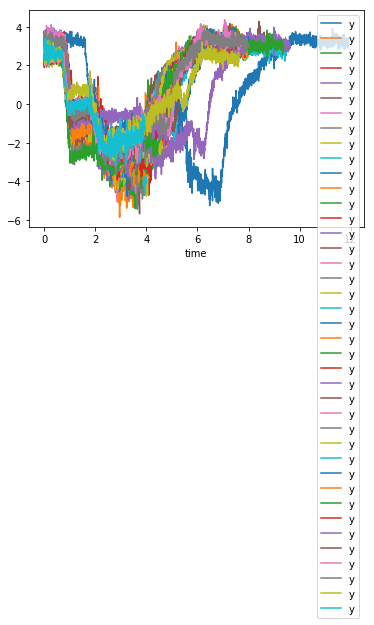

In [23]:
state = '59d638667bfe0b5f22bd6446: Pitasc-Sub - White Part Mount Tilted'
selector = 'y'

#pd.DataFrame(dict_training_data[state][1]).plot('time', selector)

ax = pd.DataFrame(dict_training_data[state][0]).plot('time', selector)
if len(dict_training_data[state]) > 1:
    for i in range(1, len(dict_training_data[state])):
        pd.DataFrame(dict_training_data[state][i]).plot('time', selector, ax=ax)

In [253]:
import numpy as np
def DTWDistance(s1, s2, w):
    DTW={}

    # window for checking, convolution window
    w = max(w, abs(len(s1)-len(s2)))
    
    # initialization of DTW dict
    for i in range(-1, len(s1)):
        for j in range(-1, len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    # 
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

,x,y,z
time,,,
00:00:08.120000,3.540881,2.978463,-3.111683
00:00:08.130000,3.510224,3.146479,-2.851099
00:00:08.140000,3.535772,3.115931,-2.943070
00:00:08.150000,3.586867,2.840996,-3.127012
00:00:08.160000,3.433582,3.054834,-3.249640


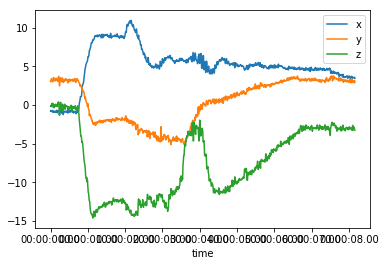

In [306]:
def convertSeries(data):
    df = pd.DataFrame(data)
    
    # convert time to timedelta type
    df['time'] = pd.to_timedelta(df['time'], unit='s')
    df = df.set_index('time')

    # resample to 10ms bins
    ts = df.resample('10l').mean().fillna(method='pad')

    #Original
    #df.plot(title='original')

    #Resampled
    #ax = ts.plot(title='resampled')

    #Filtered
    # pad nan values in between
    # afterward fill all nan values with back values (empty startvalues)
     # finally fill all nan values with front values (empty endvalues)
    ts2 = ts.rolling(15, win_type='parzen', center=True).mean()\
        .fillna(method='pad')\
        .fillna(method='bfill')\
        .fillna(method='ffill')
    #ts2.plot(ax=ax)
    return df, ts, ts2

DTW Distance: 295.06616958926134
DTW Distance: 266.95313912330045
DTW Distance: 264.1293668243352
DTW Distance: 264.5446913121395
DTW Distance: 270.7315269119181
DTW Distance: 274.29881183667345
DTW Distance: 260.2112143833418
DTW Distance: 274.32968239520153
DTW Distance: 262.67996344893606
DTW Distance: 258.00577099825597
DTW Distance: 260.95690534306954
DTW Distance: 258.0054033950712
DTW Distance: 260.12700505143914
DTW Distance: 255.9404179503339
DTW Distance: 268.753599923804
DTW Distance: 256.4889379001602


KeyboardInterrupt: 

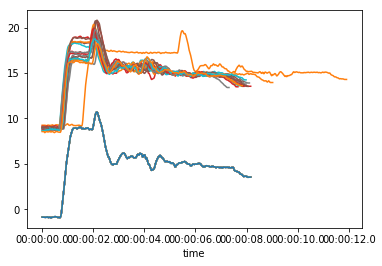

In [312]:
# Taking the second as reference
df, ts, ts2 = convertSeries(dict_training_data[state][1])

#Resampled
#ax = ts.plot(title='resampled')
#ts2.plot(ax=ax)

df_x, ts_x, ts2_x = convertSeries(dict_training_data[state][2])

#Resampled
#ts_x.plot(title='resampled', ax=ax)
#ts2_x.plot(ax=ax)
other = '59d638667bfe0b5f22bd6457: Pitasc-Sub - Erebus Mount Part'

for data in dict_training_data[state]:
    df_x, ts_x, ts2_x = convertSeries(data)
    dist =  DTWDistance(ts2['x'].as_matrix(), ts2_x['x'].as_matrix(), 500)
    if dist > 25.0:
        ax = ts2['x'].plot()
        ts2_x['x'].plot(ax=ax)
    print "DTW Distance:", dist
#print len(ts_x['x'].as_matrix())
#print len(ts['x'].as_matrix())

In [229]:
ts['x'].head()

time
00:00:00          -0.766424
00:00:00.010000   -0.705111
00:00:00.020000   -0.827738
00:00:00.030000   -0.781753
00:00:00.040000   -0.827738
Freq: 10L, Name: x, dtype: float64

In [230]:
ts_x['x'].head()

time
00:00:00          -0.981023
00:00:00.010000   -0.858395
00:00:00.020000   -0.950366
00:00:00.030000   -1.042337
00:00:00.040000   -0.929928
Freq: 10L, Name: x, dtype: float64